# **Store Sales Forecasting: Project Reto**

## **Team Equipo1:**



### **-  Carlos Alberto Hurtado Sánchez**

### **-  Gerardo Peña Pérez**

### **-  Wenguang Hu**

### **-  Kevin Joan Delgado Pérez**

In this competition from Kaggle the team analized a data set about store sales. Specifically the topic is time series forecasting. The data of store sales come from Corporacion Favorita, a Ecuadorian grocery retailer company.

![](https://play-lh.googleusercontent.com/diDnGgIEyNRB44eiVhEPWSVHRs_X0ZYACFDoL-1lkaGUzEeqWv_68VX_Z-B_QqBTcg)

The data set contains a different types of stores and different product families, is important to know about the time series, because the data starts from 01/01/13 to 31/08/2017. 

Is important to say about the test data, because will be the next 15 days of the last day train data store sales.
 

***The objetive for this competition is predict the sales of each product familie and the combinations of each store.***

The project Reto consists in the analysis of this competition and do a model of Machine Learning to completing the objetive. In the data, there is 6 data sets with diferent type of data:

* **Train:** contains the time series and the combination of the product families. Additionally, there is a sales column with the total sales according to the date, and the column onpromotion to count the promotion articles.

* **Test:** contains a part of data from the fully data set. 

* **Store:** gave information of cities, states, type and clusters.

* **Transactions:** Gave the details of the sales of the stores and some changes of transactions from the stores.

* **Holidays:** This data will help to search for outliers or additional information from the day or some celebration in the country.

* **Daily Oil price:** gave information from oil sold or prices, because the type of class, there are dome product families that maybe will be affected.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [4]:
df_train = pd.read_csv("reto_data/train.csv")
df_test = pd.read_csv("reto_data/test.csv")

df_stores = pd.read_csv("reto_data/stores.csv")  
df_transactions = pd.read_csv("reto_data/transactions.csv").sort_values(["store_nbr", "date"])
df_oil = pd.read_csv("reto_data/oil.csv")  
df_holiday = pd.read_csv("reto_data/holidays_events.csv")  

In [5]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [25]:
df_train["date"] = pd.to_datetime(df_train['date'])
df_test["date"] = pd.to_datetime(df_test['date'])
df_transactions["date"] = pd.to_datetime(df_transactions['date'])
df_oil["date"] = pd.to_datetime(df_oil['date'])

#df_train['date'].head()
#df_transactions.head()

# **Analysis of Oil**

First, we try to check if there are some relationship between Oil Price and Transaction,  
We get the graph of  Oil Price against time, and have the rolling average of Oil Price.  
and then we have the graph of Transaction against time, and have the rolling average of Transaction.  


We notice that for the Oil Price graph, it is going down in 4 years,  
and for the Transaction graph, it is almost flat in 4 year.  
I suspect they may not have linear relationship.

In [6]:
average_price = df_oil.groupby('date')['dcoilwtico'].mean()
average_price.head()

date
2013-01-01      NaN
2013-01-02    93.14
2013-01-03    92.97
2013-01-04    93.12
2013-01-07    93.20
Name: dcoilwtico, dtype: float64

<AxesSubplot:title={'center':'Rolling Average of Oil Price'}, xlabel='date'>

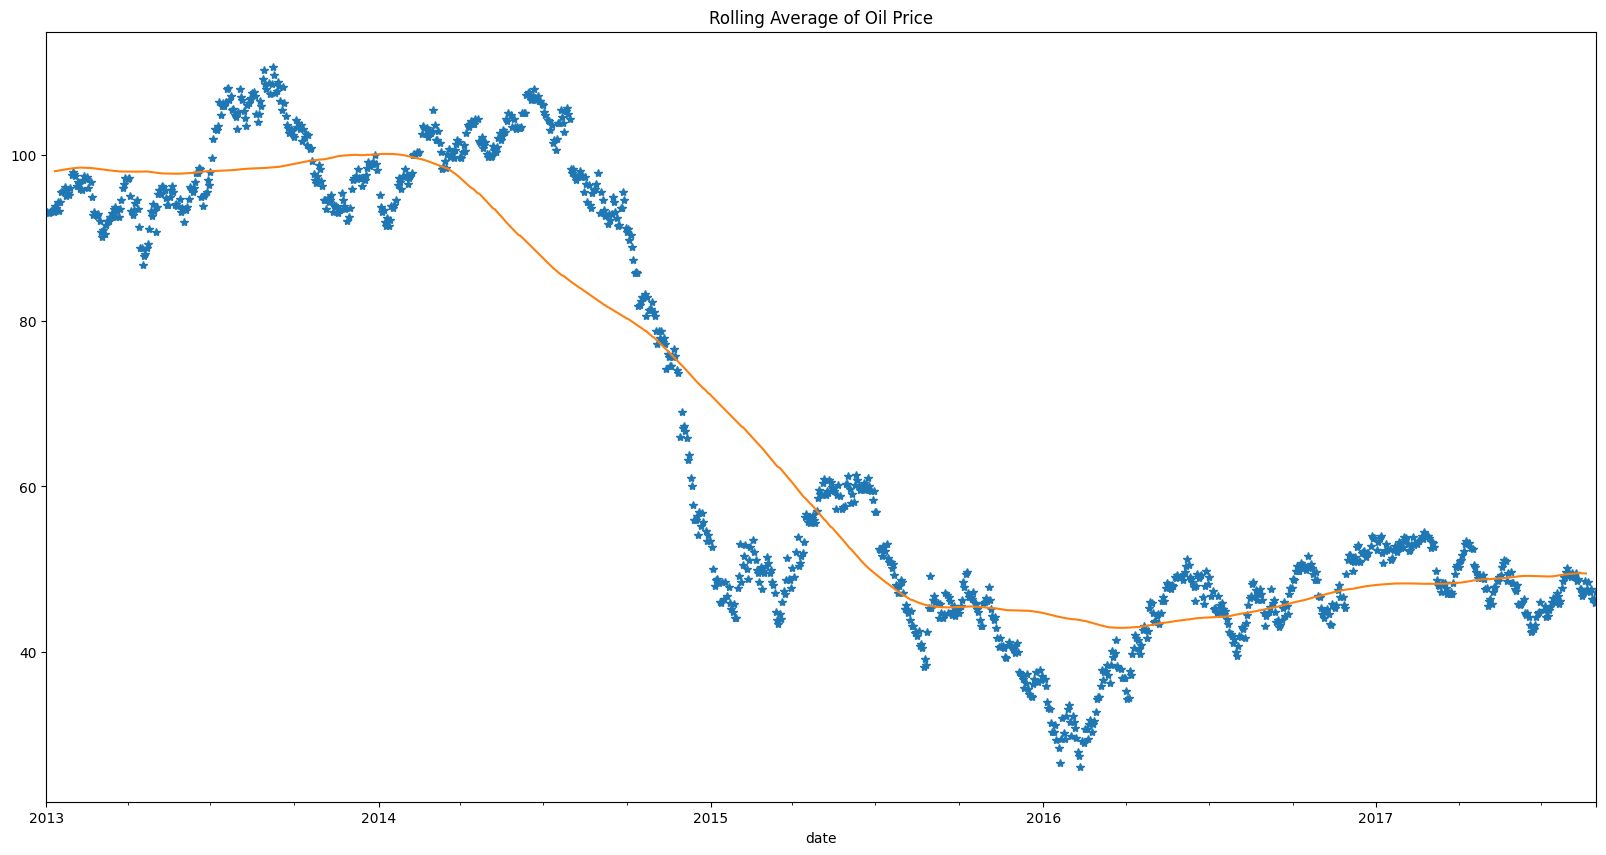

In [10]:
moving_average3 = average_price.rolling(window=365, center=True, min_periods=183).mean()
average_price.plot(style='*',figsize=(20,10), title='Rolling Average of Oil Price')
moving_average3.plot()

<AxesSubplot:title={'center':'rolling average of Transaction'}, xlabel='date'>

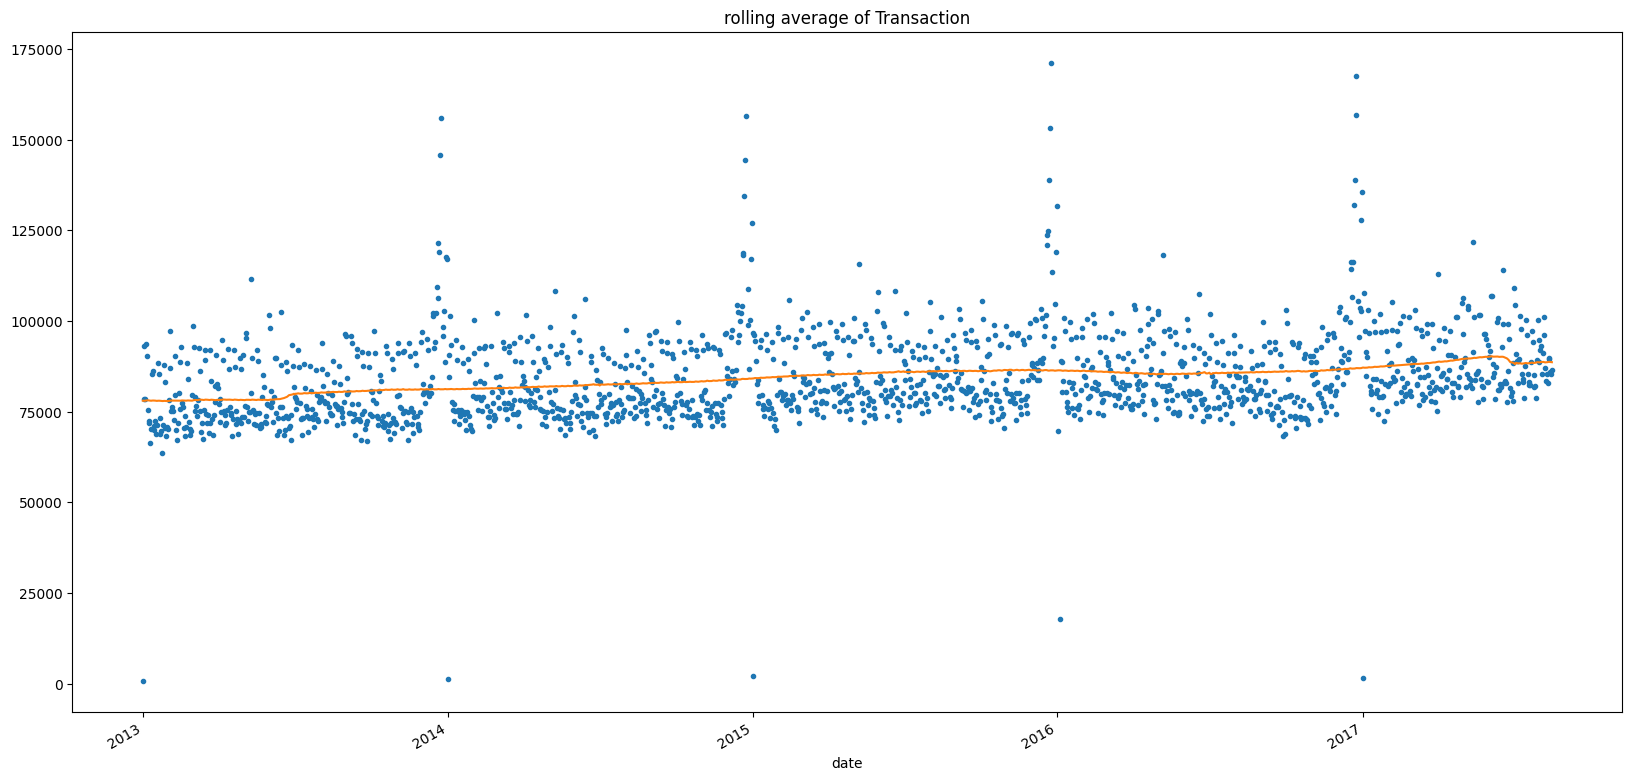

In [26]:
sum_transaction = df_transactions.groupby('date').sum()['transactions']
sum_transaction = sum_transaction.copy()
moving_sum_transaction = sum_transaction.rolling(window=365, center=True, min_periods=183).mean()
sum_transaction.plot(style='.', figsize=(20, 10), title='rolling average of Transaction')
moving_sum_transaction.plot()

Then I merge the Oil Price with Transaction by the date.
Then draw the graph of Transaction Vs Oil Price.

From the scatter, I can not see a significant relaionship between Oil Price and Transaction.

Then I calculate the Correlationship between Oil Price and Transaction,  
The spearman correlationship is 0.0376, it seems the Oil Price is not very relative the Transaction.

<AxesSubplot:title={'center':'Transaction Vs Oil Price'}, xlabel='dcoilwtico', ylabel='transactions'>

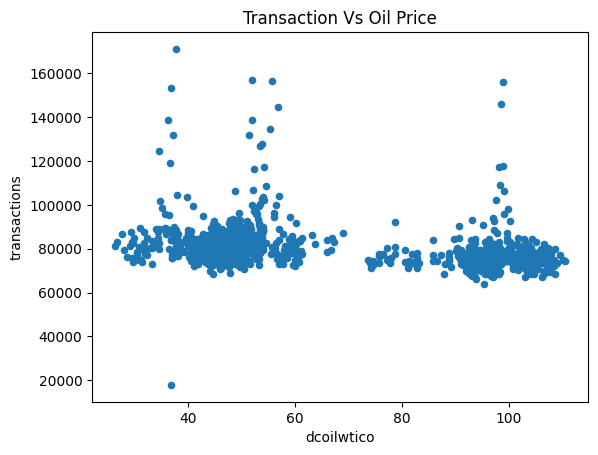

In [29]:
date_transaction_oil = pd.merge(sum_transaction, average_price, on='date')
date_transaction_oil.plot.scatter(x='dcoilwtico', y='transactions', title='Transaction Vs Oil Price')

In [23]:
df_transactions["date"] = pd.to_datetime(df_transactions['date'])
#df_transactions

In [11]:
df_aux_merged_oil = pd.merge(df_transactions, df_oil, how='left')
df_aux_merged_oil = pd.merge(df_aux_merged_oil, df_train, how = 'left')

In [12]:
pearson_corr = df_aux_merged_oil.corr('pearson')['dcoilwtico'].loc['transactions']
spearman_corr = df_aux_merged_oil.corr('spearman')['dcoilwtico'].loc['transactions']

In [13]:
print(f'pearson_corr = {pearson_corr:.4f} and spearman corr = {spearman_corr:.4f}')

pearson_corr = 0.0218 and spearman corr = 0.0376


Then I am trying to get the relation ship between the Sales and Transaction.  
We draw the graph of Sale against time, and draw the rolling average of Sale on it too.  
We can see the sale is increasing.  
In the other hand, the transaction is almost flat.

<AxesSubplot:title={'center':'rolling average of Sales'}, xlabel='date'>

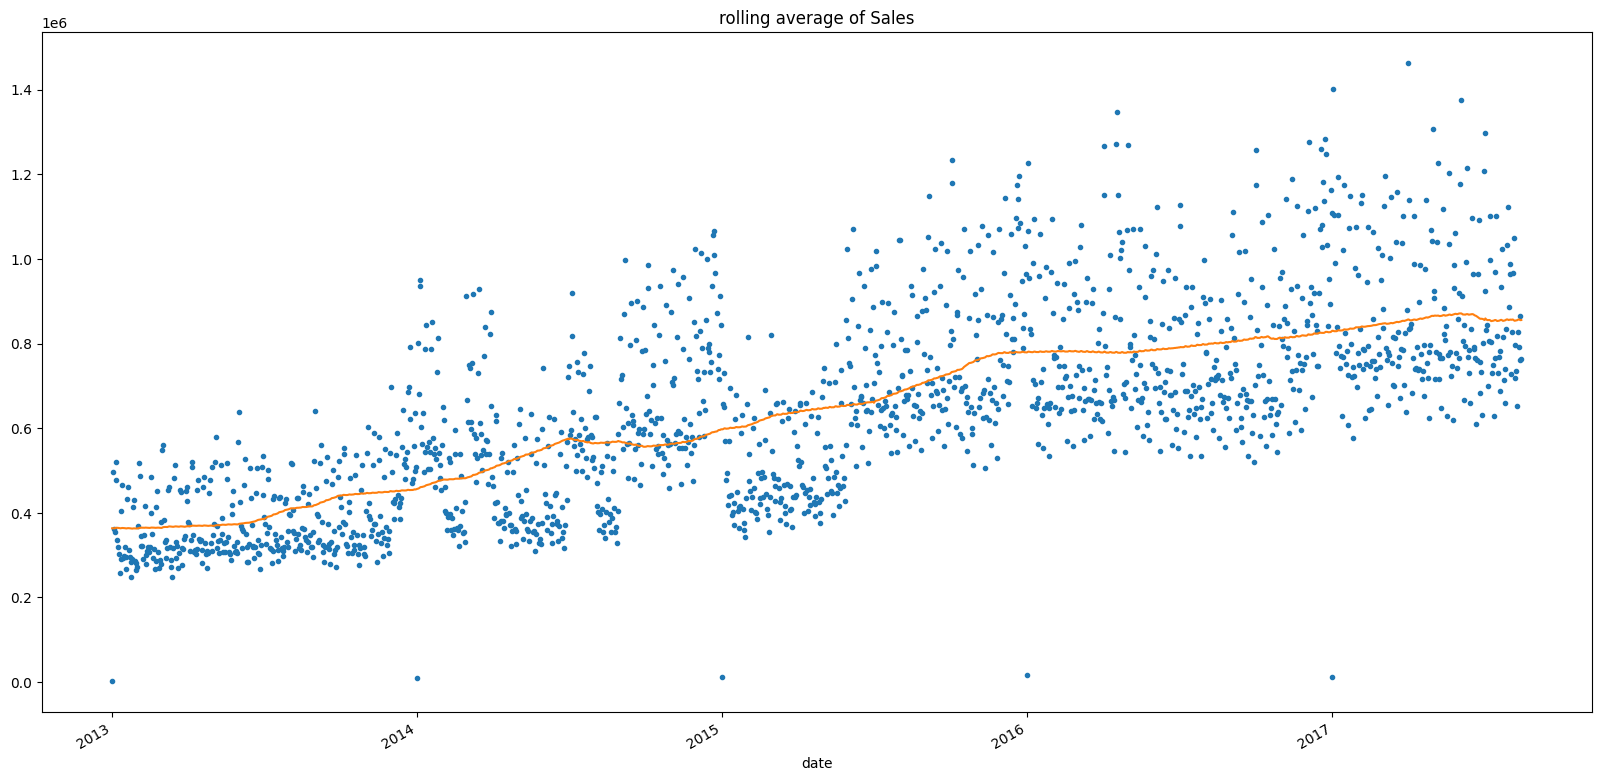

In [ ]:
sum_sales = df_train.groupby('date').sum()['sales']
sum_sales = sum_sales.copy()
moving_sum_sales = sum_sales.rolling(window=365, center=True, min_periods=183).mean()
sum_sales.plot(style='.', figsize=(20, 10), title='rolling average of Sales')
moving_sum_sales.plot()

The we draw the scatter about Transcations against Sales,  
We can see there is a clear proportional relationship between Transactions and Sales.  

And then we calculate the correlationship between Transactions and Sales,  
We have the spearman correlationship 0.7335,  
So it means the Transaction has a high linear relationship with Sales 

<AxesSubplot:title={'center':'Transaction Vs Sales'}, xlabel='transactions', ylabel='sales'>

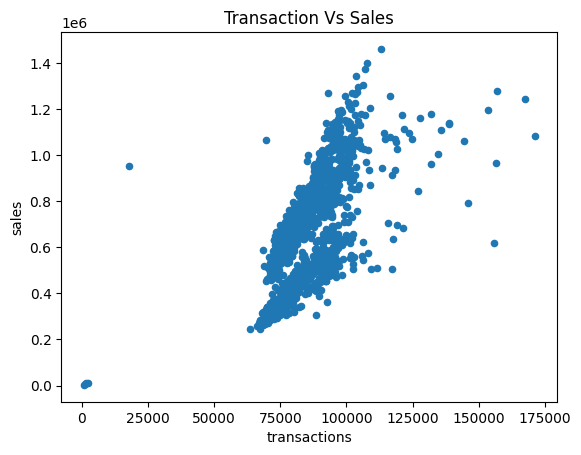

In [31]:
date_transaction_sales = pd.merge(sum_transaction, sum_sales, on='date')
date_transaction_sales.plot.scatter(x='transactions', y='sales', title='Transaction Vs Sales')

In [32]:
pearson_corr = date_transaction_sales.corr('pearson')['sales'].loc['transactions']
spearman_corr = date_transaction_sales.corr('spearman')['sales'].loc['transactions']
print(f'pearson_corr = {pearson_corr:.4f} and spearman corr = {spearman_corr:.4f}')

pearson_corr = 0.6765 and spearman corr = 0.7335


# **Correlation from the 'onpromotion' column with sales**

En caso de que no haya una relación entre estas dos variables, podríamos ignorar las promociones para hacer el modelo que prediga las ventas

In [15]:
df_train["date"] = pd.to_datetime(df_train['date'])
df_train['onpromotion'].isna().sum()

0

In [16]:
avg_prom = df_train.groupby('date')['onpromotion'].mean()
avg_prom.head()

date
2013-01-01    0.0
2013-01-02    0.0
2013-01-03    0.0
2013-01-04    0.0
2013-01-05    0.0
Name: onpromotion, dtype: float64

In [17]:
avg_promo = avg_prom.copy()

Antes de comparar las variables, hay que ver como se comportan las promociones promedio en el tiempo. 
Notamos que crecen con el tiempo.... las ventas tienen un comportamiento similar, esto podría significar que en efecto están correlacionadas

<AxesSubplot:xlabel='date'>

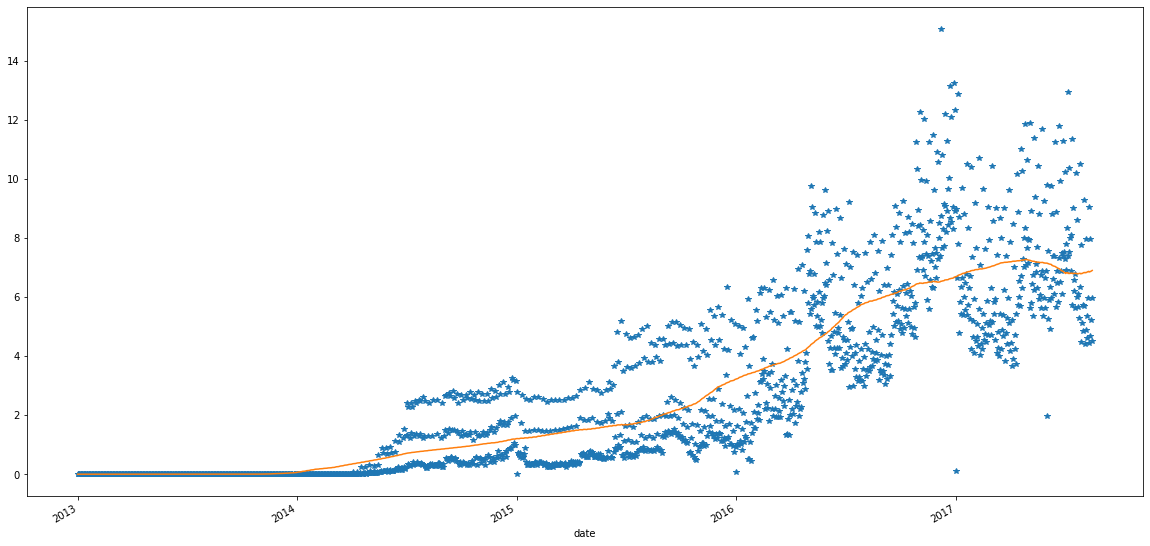

In [18]:
moving_average3 = avg_promo.rolling(window=365, center=True, min_periods=183).mean()
avg_promo.plot(style='*',figsize=(20,10))
moving_average3.plot()

obtenemos una correlación de 0.427, lo que nos dice que sí existe relación entre las ventas y las promociones, es decir que cuando las promociones crecen, las ventas también, sin embargo no consideramos dicha correlación suficientemente significativa como para considerarla en el modelo.



In [19]:
pearson_corr = df_train.corr('pearson')['onpromotion'].loc['sales']
spearman_corr = df_train.corr('spearman')['onpromotion'].loc['sales']
print(f'pearson_corr = {pearson_corr:.4f} and spearman corr = {spearman_corr:.4f}')

pearson_corr = 0.4279 and spearman corr = 0.5380


<AxesSubplot:xlabel='onpromotion', ylabel='sales'>

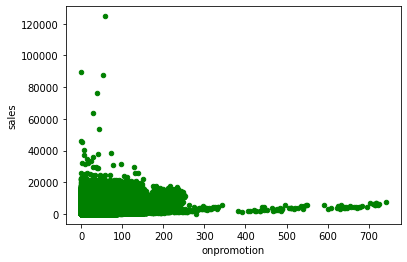

In [20]:
df_train.plot.scatter(x = "onpromotion", y = "sales", color = "g")

Debido a que se nota un comportamiento periódico en el conjunto de datos, optaremos por basar el modelo en la periodicidad con la que se comportan los datos

# **Store sales packages**

In [21]:
import numpy as np 
import pandas as pd
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.signal import periodogram
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# **Import data**

In [22]:
data_dir = Path("data")

holiday_dtype = {
    "type": "category",
    "locale": "category",
    "locale_name": "category",
    "description": "category",
    "transferred": "bool"
}

store_dtype = {
    "store_nbr": "category",
    "family": "category",
    "sales": "float32",
    "onpromotion": "float32"
}

holidays_events = pd.read_csv(
    data_dir / "holidays_events.csv",
    dtype=holiday_dtype,
    index_col="date",
    parse_dates=["date"]
)

holidays_events = holidays_events.to_period("D")

store_sales = pd.read_csv(
    data_dir / "train.csv",
    dtype=store_dtype,
    index_col="date",
    parse_dates=["date"]
)

store_sales = store_sales.to_period("D")

store_sales = store_sales.set_index(["store_nbr", "family"], append=True)

store_sales.drop("id", axis=1, inplace=True)  # Ignore id

average_sales = store_sales.groupby("date")["sales"] \
    .mean() \
    .squeeze()  # Convert to pd.Series

# **Configuring Sesonal Features**

### **Seasonal indicators**

In [23]:
# annotations: https://www.kaggle.com/code/ryanholbrook/seasonality
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

### **Periodgram**

In [24]:
# annotations: https://www.kaggle.com/code/ryanholbrook/seasonality
def plot_periodogram(ts, detrend='linear', ax=None):    
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

### **Configure scatter**

In [25]:
scatter_kws = dict(
    color="0.75",  # Blue color for straight lines
    style=".-",  # Dots connected by lines
    markeredgecolor="0.25",  # Gray dot contour
    markerfacecolor="0.25",  # Gray dots
    legend=False,  # Ignore legend
    alpha=0.7  # Alpha of dots
)

### **Plotting seasonal features**

<AxesSubplot:title={'center':'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='sales'>

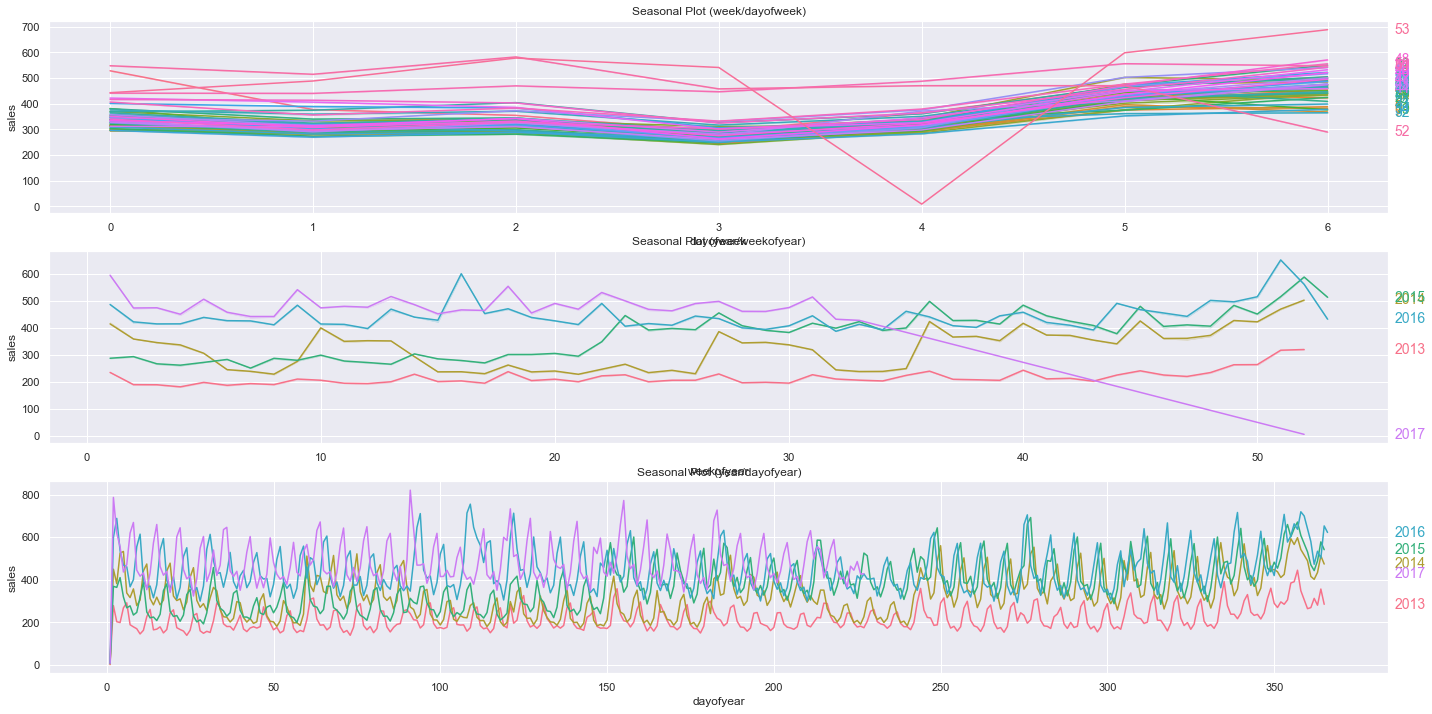

In [26]:
sns.set(rc={"figure.figsize": (14,10)})

X = average_sales.to_frame()  # Convert pd.Series to pd.DataFrame

X["year"] = X.index.year
X["week"] = X.index.week
X["dayofweek"] = X.index.dayofweek
X["dayofyear"] = X.index.dayofyear
X["weekofyear"] = X.index.weekofyear

fig, ax = plt.subplots(3, 1, figsize=(24,12))

seasonal_plot(X, y="sales", period="week", freq="dayofweek", ax=ax[0])
seasonal_plot(X, y="sales", period="year", freq="weekofyear", ax=ax[1])
seasonal_plot(X, y="sales", period="year", freq="dayofyear", ax=ax[2])

### **Periodgram (Fourier features)**

C:\Users\gerar\AppData\Local\Temp\ipykernel_25248\841079489.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodogram(average_sales)


<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

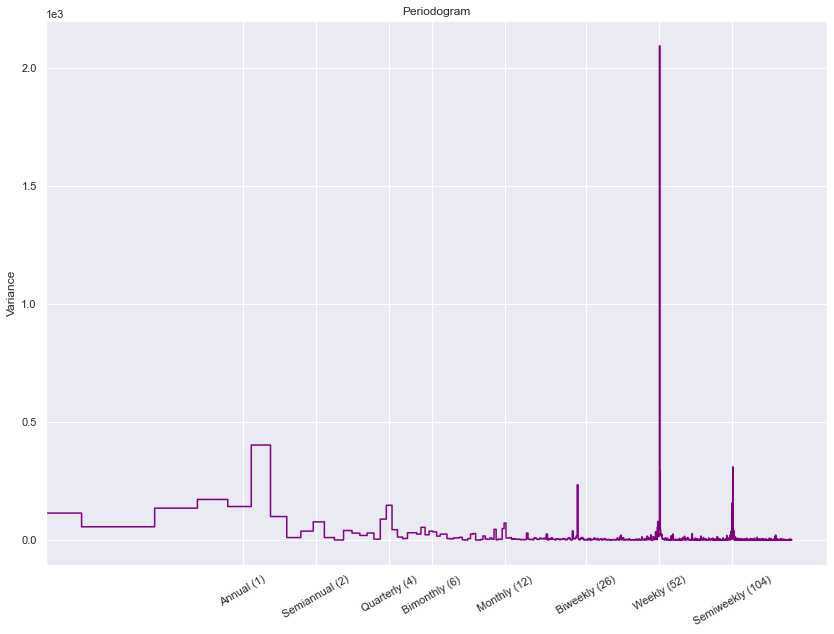

In [27]:
plot_periodogram(average_sales)

# **Seasonality**

In [28]:
y = average_sales.copy()

from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier0 = CalendarFourier(freq="4Y", order=16)
fourier1 = CalendarFourier(freq="2Y", order=8)
fourier2 = CalendarFourier(freq="Y", order=20)
fourier3 = CalendarFourier(freq="M", order=2)

dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier0, fourier1, fourier2, fourier3],
    drop=True,
)

X = dp.in_sample()

### **Run Linear Regression**

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

### **Make predictions**

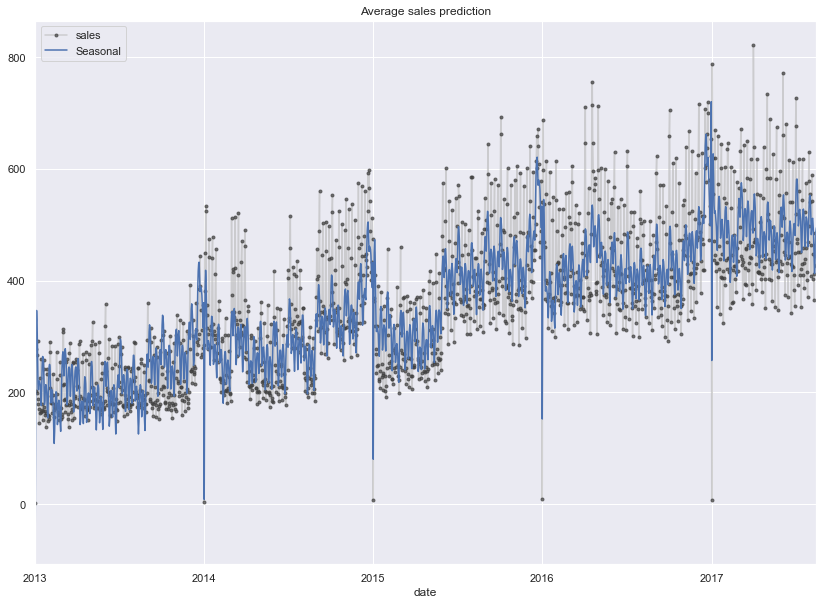

In [30]:
y_pred = pd.Series(
    model.predict(X),
    index=X.index
)

ax = y.plot(**scatter_kws, title="Average sales prediction")
ax = y_pred.plot(ax=ax, label="Seasonal")

ax.legend();

### **Compare periodgrams**

C:\Users\gerar\AppData\Local\Temp\ipykernel_25248\2955418509.py:5: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax[0] = plot_periodogram(y, ax=ax[0])
C:\Users\gerar\AppData\Local\Temp\ipykernel_25248\2955418509.py:8: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax[1] = plot_periodogram(y_deseason, ax=ax[1])


Text(0.5, 1.0, 'Deseasonalized')

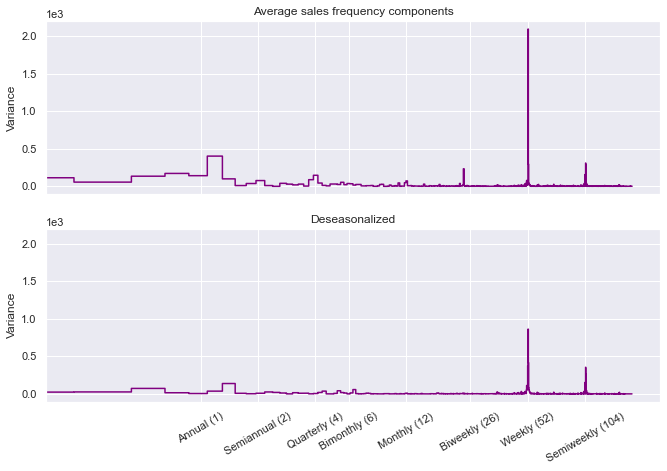

In [31]:
y_deseason = y - y_pred

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(11,7))

ax[0] = plot_periodogram(y, ax=ax[0])
ax[0].set_title("Average sales frequency components")

ax[1] = plot_periodogram(y_deseason, ax=ax[1])
ax[1].set_title("Deseasonalized")

Comparing the above periodograms, it can be noted that the model was able to capture at least 50% of the seasonal variation in average sales. It is possible that if the model takes into account the dates of holidays it can help the model to capture more of the seasonal variance.

# **Checking for Holidays integration to the model**

Text(0.5, 1.0, 'National and regional holidays')

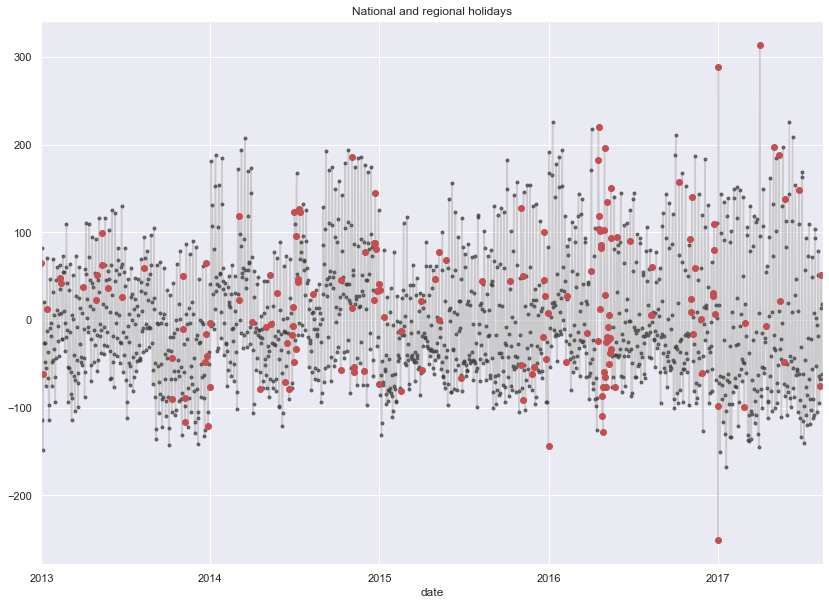

In [32]:
store_sales_start = store_sales.index[0][0]

holidays = (
    holidays_events
    .query("locale in ['National', 'Regional']")
    .loc[str(store_sales_start):, ["description"]]
    .assign(description=lambda x: x.description.cat.remove_unused_categories())
)

holidays = holidays[holidays.index.isin(y_deseason.index)]  # Drop all dates not in store_sales
holidays = holidays[~holidays.index.duplicated(keep="first")]  # Drop duplicate dates

ax = y_deseason.plot(**scatter_kws)

plt.plot_date(holidays.index, y_deseason[holidays.index], color="C3")

ax.set_title("National and regional holidays")

### **Sales prediction with Holidays**

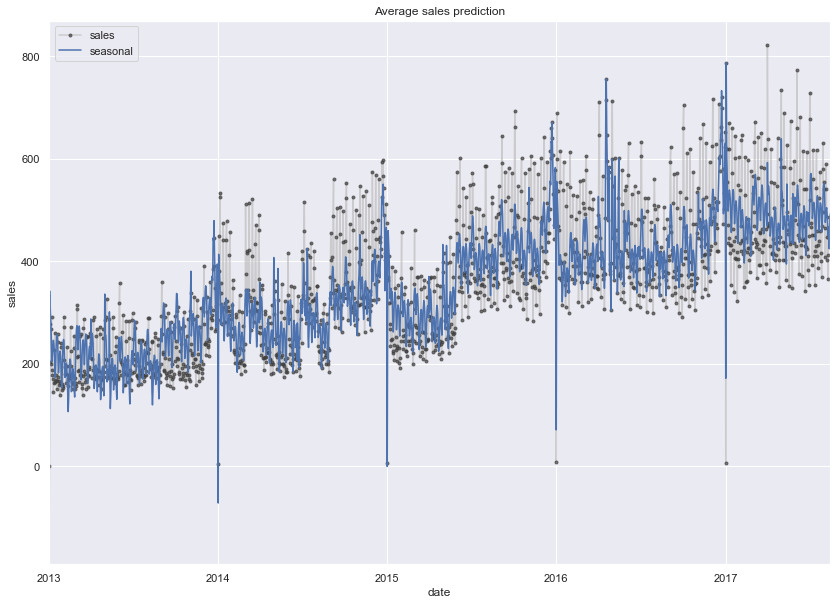

In [33]:
holidays_dummies = pd.get_dummies(holidays)
X_holidays = X.join(holidays_dummies, on="date").fillna(0.0)

model = LinearRegression()
model.fit(X_holidays, y)

y_pred = pd.Series(
    model.predict(X_holidays),
    index=X_holidays.index
)

ax = y.plot(**scatter_kws, title="Average sales prediction")
ax = y_pred.plot(ax=ax, label="seasonal")

ax.set_ylabel("sales")
ax.legend();

### **Comparing periodgrams to evaluate upgrades**

C:\Users\gerar\AppData\Local\Temp\ipykernel_25248\2955418509.py:5: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax[0] = plot_periodogram(y, ax=ax[0])
C:\Users\gerar\AppData\Local\Temp\ipykernel_25248\2955418509.py:8: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax[1] = plot_periodogram(y_deseason, ax=ax[1])


Text(0.5, 1.0, 'Deseasonalized')

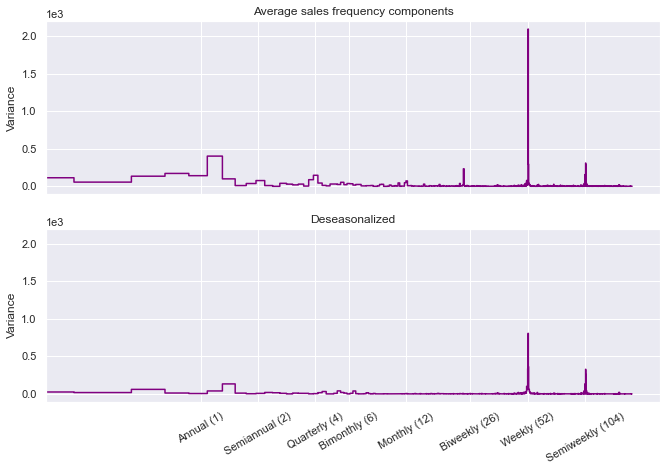

In [34]:
y_deseason = y - y_pred

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(11,7))

ax[0] = plot_periodogram(y, ax=ax[0])
ax[0].set_title("Average sales frequency components")

ax[1] = plot_periodogram(y_deseason, ax=ax[1])
ax[1].set_title("Deseasonalized")

Unfortunately taking into account the holidays does not make a significant impact on the ability of the model to capture the seasonal variance of the data.

# **Submission**

In [35]:
y = store_sales.unstack(["store_nbr", "family"])

y.drop("onpromotion", axis=1, inplace=True)  # Ignore 'onpromotion' feature for now

# Fourier calendars
fourier0 = CalendarFourier(freq="4Y", order=16)
fourier1 = CalendarFourier(freq="2Y", order=8)
fourier2 = CalendarFourier(freq="Y", order=20)
fourier3 = CalendarFourier(freq="M", order=2)

dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier0, fourier1, fourier2, fourier3],
    drop=True,
)

X = dp.in_sample()

# Additional features
X["NewYear"] = (X.index.dayofyear == 1)

model = LinearRegression(fit_intercept=False)
Xtrain, Xtest, ytrain, ytest = train_test_split(X.values, y.values,random_state=1)
model.fit(Xtrain, ytrain)

y_pred = pd.DataFrame(model.predict(Xtest),  columns=y.columns)  #index=X.index,

- Para poder obtener un accuracy sin subirlo a la plataforma, dividimos el dataset en set de testeo y set de entrenamiento.
Se asigna 25% del dataset total para el testeo y un 75% para el entrenamiento.
- Obtenemos un accuracy de 0.29

In [36]:
acc = r2_score(ytest, y_pred)
acc

0.2966265606973766

Al hacer cross validation obtenemos un accuracy promedio de 0.25

In [37]:
print("score of the cross validation: " + str(cross_val_score(model,Xtrain,ytrain, cv=10).mean()))

score of the cross validation: 0.2536712732932161


### **Sample prediction**

### **Preparing csv to submit**

In [ ]:
del store_dtype["sales"]

test = pd.read_csv(
    data_dir / "test.csv",
    dtype=store_dtype,
    parse_dates=["date"]
)

test["date"] = test["date"].dt.to_period("D")
test = test.set_index(["store_nbr", "family", "date"]).sort_index()

X_test = dp.out_of_sample(steps=16)
X_test.index.name = "date"
X_test["NewYear"] = (X_test.index.dayofyear == 1)

y_submit = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
y_submit = y_submit.stack(["store_nbr", "family"])
y_submit = y_submit.join(test.id).reindex(columns=["id", "sales"])
y_submit.to_csv("submissions.csv", index=False)